In [7]:
%matplotlib inline
import cv2
import copy
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,20))

<Figure size 720x1440 with 0 Axes>

<Figure size 720x1440 with 0 Axes>

In [9]:
img = cv2.imread('Test_Images/House.tiff')
img.shape

(256, 256, 3)

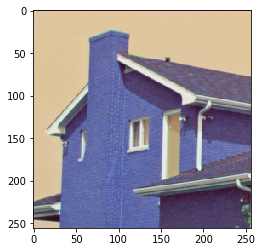

In [10]:
plt.imshow(img)

In [11]:
grayImg = np.zeros((img.shape[0], img.shape[1]))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        grayImg[i][j] = round((int(img[i][j][0]) + int(img[i][j][1]) + int(img[i][j][2]))/3)

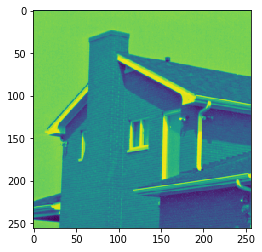

In [12]:
plt.imshow(grayImg)

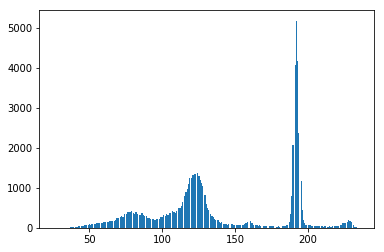

In [13]:
plt.hist(grayImg.ravel(),256)
plt.show()

In [14]:
newMat = np.zeros(grayImg.shape)
newMat = newMat.astype(int)

In [18]:
for i in range(grayImg.shape[0]):
    for j in range(grayImg.shape[1]):
        if grayImg[i][j] > 250:
            newMat[i][j] = 0
        else:
            newMat[i][j] = 1

In [19]:
newMat

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

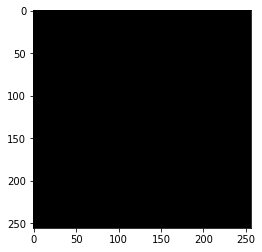

In [20]:
plt.imshow(newMat, cmap='gray')

In [21]:
conflict_res = []
def fourN(i,j,counter):
    if newMat[i - 1][j] == 0 and newMat[i][j - 1] == 0 and newMat[i][j] != 0:
        counter = counter + 1
        newMat[i][j] = counter
        return counter
    elif newMat[i - 1][j] != 0 and newMat[i][j - 1] != 0 and newMat[i][j] != 0:
        newMat[i][j] = min(newMat[i][j - 1], newMat[i - 1][j])
        conflict_res.append([(i,j - 1), (i - 1,j)])
        return counter
    elif newMat[i - 1][j] != 0 and newMat[i][j - 1] == 0 and newMat[i][j] != 0:
        newMat[i][j] = newMat[i - 1][j]
        return counter
    elif newMat[i - 1][j] == 0 and newMat[i][j - 1] != 0 and newMat[i][j] != 0:
        newMat[i][j] = newMat[i][j - 1]
        return counter
    else:
        return counter

In [22]:
counter = 0
for i in range(1,grayImg.shape[0]):
    for j in range(1,grayImg.shape[1]):
        counter = fourN(i,j,counter)

"""
for i in range(len(conflict_res)):
    if newMat[conflict_res[i][0][0]][conflict_res[i][0][1]] <= newMat[conflict_res[i][1][0]][conflict_res[i][1][1]]:
        newMat[conflict_res[i][1][0]][conflict_res[i][1][1]] = newMat[conflict_res[i][0][0]][conflict_res[i][0][1]]
    else:
        newMat[conflict_res[i][0][0]][conflict_res[i][0][1]] = newMat[conflict_res[i][1][0]][conflict_res[i][1][1]]"""
newCount = 0
for i in range(grayImg.shape[0] - 2, -1, -1):
    for j in range(grayImg.shape[1] - 2, -1, -1):
        if grayImg[i][j] == grayImg[i][j + 1]:
            newMat[i][j] = min(newMat[i][j] , newMat[i][j + 1])
            #newMat[i][j + 1] = min(newMat[i][j] , newMat[i][j + 1])
        if grayImg[i][j] == grayImg[i + 1][j]:
            newMat[i][j] = min(newMat[i + 1][j] , newMat[i][j])
            #newMat[i + 1][j] = min(newMat[i][j] , newMat[i + 1][j])
        if grayImg[i][j] == grayImg[i + 1][j + 1]:
            newMat[i][j] = min(newMat[i][j] , newMat[i + 1][j + 1])
            #newMat[i + 1][j + 1] = min(newMat[i][j] , newMat[i + 1][j + 1])
        if grayImg[i][j] == grayImg[i + 1][j - 1]:
            newMat[i][j] = min(newMat[i][j] , newMat[i + 1][j - 1])
            #newMat[i + 1][j - 1] = min(newMat[i][j] , newMat[i + 1][j - 1])

In [23]:
unique, value = np.unique(grayImg, return_counts=True)
inten = dict(zip(unique,value))
inten

{26.0: 1,
 28.0: 4,
 29.0: 4,
 30.0: 4,
 31.0: 4,
 32.0: 4,
 33.0: 4,
 34.0: 4,
 35.0: 7,
 36.0: 6,
 37.0: 11,
 38.0: 10,
 39.0: 10,
 40.0: 15,
 41.0: 21,
 42.0: 27,
 43.0: 38,
 44.0: 38,
 45.0: 51,
 46.0: 53,
 47.0: 76,
 48.0: 66,
 49.0: 82,
 50.0: 92,
 51.0: 81,
 52.0: 98,
 53.0: 99,
 54.0: 103,
 55.0: 129,
 56.0: 125,
 57.0: 126,
 58.0: 118,
 59.0: 130,
 60.0: 150,
 61.0: 139,
 62.0: 138,
 63.0: 144,
 64.0: 160,
 65.0: 161,
 66.0: 179,
 67.0: 170,
 68.0: 197,
 69.0: 238,
 70.0: 247,
 71.0: 275,
 72.0: 288,
 73.0: 281,
 74.0: 334,
 75.0: 349,
 76.0: 386,
 77.0: 397,
 78.0: 389,
 79.0: 408,
 80.0: 381,
 81.0: 349,
 82.0: 384,
 83.0: 342,
 84.0: 321,
 85.0: 330,
 86.0: 378,
 87.0: 318,
 88.0: 292,
 89.0: 294,
 90.0: 252,
 91.0: 234,
 92.0: 232,
 93.0: 215,
 94.0: 222,
 95.0: 203,
 96.0: 209,
 97.0: 231,
 98.0: 229,
 99.0: 264,
 100.0: 280,
 101.0: 323,
 102.0: 306,
 103.0: 337,
 104.0: 326,
 105.0: 376,
 106.0: 365,
 107.0: 413,
 108.0: 404,
 109.0: 377,
 110.0: 418,
 111.0: 503,
 112.

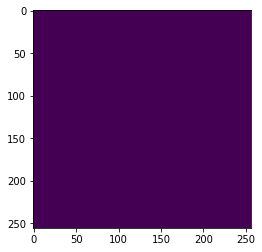

In [24]:
plt.imshow(newMat)

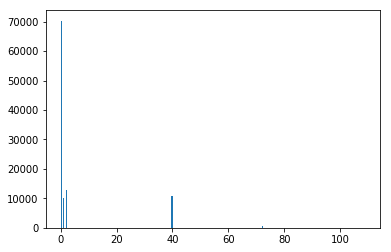

In [87]:
plt.hist(newMat.ravel(),256)
plt.show()